In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [68]:

# Step 1: Select Your Universe of Assets
# Using SPDR S&P 500 ETF Trust (SPY) as the asset
ticker = 'SPY'

  # Example for Apple Inc.
start_date = '2010-01-01'
end_date = '2023-12-28'

# Fetch the historical data
data = yf.download(ticker, start=start_date, end=end_date)

# Step 2: Determine the Lookback Period
# Using 20 trading days as the lookback period
lookback_period = 20


# Display the first few rows of the data to verify
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,87.129944,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,87.360596,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,87.422104,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,87.791130,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,88.083267,126402800


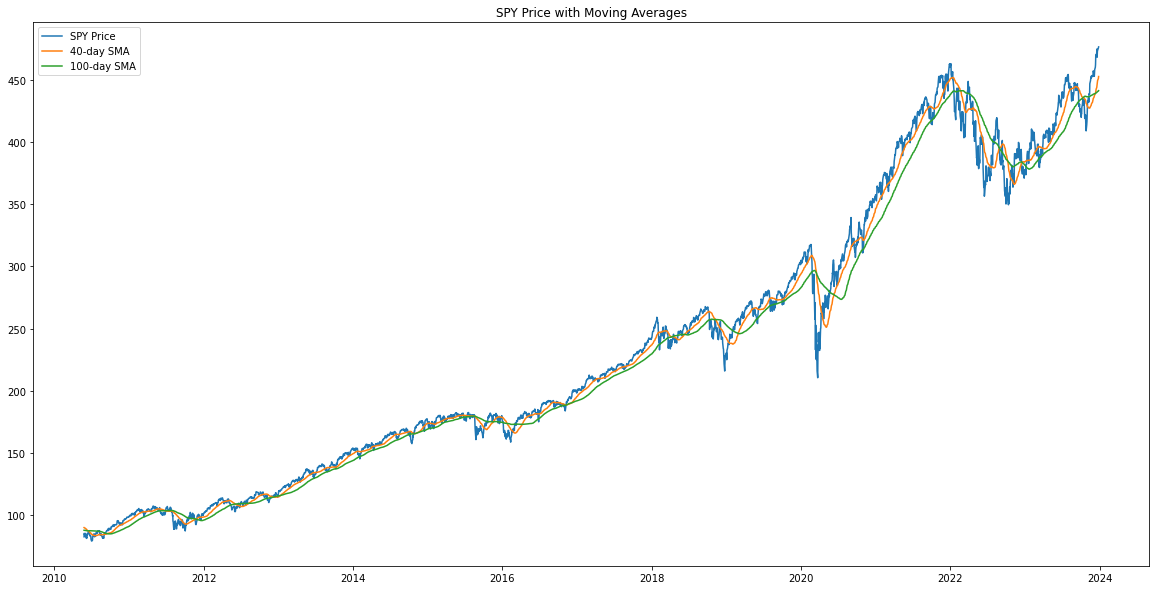

In [69]:
# Moving Averages
short_window = 40
long_window = 100

data['SMA_40'] = data['Adj Close'].rolling(window=short_window).mean()
data['SMA_100'] = data['Adj Close'].rolling(window=long_window).mean()

# MACD (Moving Average Convergence Divergence)
exp1 = data['Adj Close'].ewm(span=10, adjust=False).mean()
exp2 = data['Adj Close'].ewm(span=25, adjust=False).mean()
data['MACD'] = exp1 - exp2
data['MACD_Signal'] = data['MACD'].ewm(span=9, adjust=False).mean()

# RSI (Relative Strength Index)
delta = data['Adj Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

# Bollinger Bands
data['BB_Middle'] = data['Adj Close'].rolling(window=20).mean()
data['BB_Upper'] = data['BB_Middle'] + 2 * data['Adj Close'].rolling(window=20).std()
data['BB_Lower'] = data['BB_Middle'] - 2 * data['Adj Close'].rolling(window=20).std()
data=data.dropna()
# Plotting the Indicators
plt.figure(figsize=(20, 10))

# Adjust the subplot layout
plt.subplots_adjust(hspace=0.5)

# Price and Moving Averages Plot
#plt.subplot(411)
plt.title('SPY Price with Moving Averages')
plt.plot(data['Adj Close'], label='SPY Price')
plt.plot(data['SMA_40'], label='40-day SMA')
plt.plot(data['SMA_100'], label='100-day SMA')
plt.legend()


In [70]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,SMA_40,SMA_100,MACD,MACD_Signal,RSI,BB_Middle,BB_Upper,BB_Lower
Date,,,,,,,,,,,,,,
2010-05-26,108.480003,109.470001,106.849998,107.169998,82.733330,349719300,90.117727,87.959015,-2.484235,-1.779874,37.056928,87.826096,94.546042,81.106151
2010-05-27,109.190002,110.800003,108.779999,110.760002,85.504745,300870500,89.997297,87.942763,-2.250600,-1.874019,48.967034,87.436246,93.708410,81.164083
2010-05-28,110.639999,110.720001,108.849998,109.370003,84.431679,297933500,89.834601,87.913474,-2.155232,-1.930261,33.591034,87.071870,93.139794,81.003947
2010-06-01,108.349998,109.949997,107.370003,107.529999,83.011261,277909400,89.617867,87.869366,-2.202057,-1.984620,31.306254,86.577032,92.241770,80.912293
2010-06-02,108.080002,110.339996,107.510002,110.330002,85.172798,240243700,89.449767,87.843182,-1.979888,-1.983674,34.773232,86.299504,91.643726,80.955281


In [71]:
# Establishing Entry and Exit Criteria
# Create a 'Signal' column to hold the trading signal
data['Signal'] = 0

# Entry Criteria
# 1. MACD crosses above its signal line
# 2. Price crosses above 40-day SMA
# 3. RSI > 30 and < 70 (neutral zone)
# 4. Price touching the lower Bollinger Band
data['Signal'][(data['MACD'] > data['MACD_Signal']) & 
               (data['Adj Close'] > data['SMA_40']) & 
               (data['RSI'] > 30) & (data['RSI'] < 70) &
               (data['Adj Close'] > data['BB_Lower'])] = 1

# Exit Criteria
# 1. MACD crosses below its signal line
# 2. Price crosses below 40-day SMA
# 3. RSI > 70 (overbought zone)
# 4. Price touching the upper Bollinger Band
data['Signal'][(data['MACD'] < data['MACD_Signal']) & 
               (data['Adj Close'] < data['SMA_40']) | 
               (data['RSI'] > 70) |
               (data['Adj Close'] > data['BB_Upper'])] = -1

C:\Users\MSI\AppData\Local\Temp\ipykernel_26256\480375666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'] = 0
C:\Users\MSI\AppData\Local\Temp\ipykernel_26256\480375666.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][(data['MACD'] > data['MACD_Signal']) &
C:\Users\MSI\AppData\Local\Temp\ipykernel_26256\480375666.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [72]:
capital = 100000  # Starting capital
risk_per_trade = 0.02  # Risk 2% of capital on each trade
stop_loss_percentage = 0.05  # Stop loss at 5% of the entry price
take_profit_percentage = 0.10  # Take profit at 10% of the entry price

# Implementing the Trading Strategy with Risk Management
data['Position'] = 0  # 1 for long, -1 for short, 0 for no position
data['Entry_Price'] = 0.0
data['Stop_Loss'] = 0.0
data['Take_Profit'] = 0.0
data['Trade_Capital'] = 0.0
data['Portfolio_Value'] = capital

for index, row in data.iterrows():
    if row['Signal'] == 1 and data.at[index - 1, 'Position'] == 0:
        # Entering a long position
        entry_price = row['Adj Close']
        stop_loss = entry_price * (1 - stop_loss_percentage)
        take_profit = entry_price * (1 + take_profit_percentage)
        trade_capital = capital * risk_per_trade

        data.at[index, 'Position'] = 1
        data.at[index, 'Entry_Price'] = entry_price
        data.at[index, 'Stop_Loss'] = stop_loss
        data.at[index, 'Take_Profit'] = take_profit
        data.at[index, 'Trade_Capital'] = trade_capital
    elif row['Signal'] == -1 or (row['Low'] <= data.at[index - 1, 'Stop_Loss'] or row['High'] >= data.at[index - 1, 'Take_Profit']):
        # Exiting the position or hitting stop loss/take profit
        capital += data.at[index - 1, 'Trade_Capital'] * (row['Adj Close'] / data.at[index - 1, 'Entry_Price'] - 1)
        data.at[index, 'Position'] = 0
        data.at[index, 'Entry_Price'] = 0
        data.at[index, 'Stop_Loss'] = 0
        data.at[index, 'Take_Profit'] = 0
        data.at[index, 'Trade_Capital'] = 0
    else:
        # Carry forward the position details if there's no signal to exit
        data.at[index, 'Position'] = data.at[index - 1, 'Position']
        data.at[index, 'Entry_Price'] = data.at[index - 1, 'Entry_Price']
        data.at[index, 'Stop_Loss'] = data.at[index - 1, 'Stop_Loss']
        data.at[index, 'Take_Profit'] = data.at[index - 1, 'Take_Profit']
        data.at[index, 'Trade_Capital'] = data.at[index - 1, 'Trade_Capital']

    # Update portfolio value
    data.at[index, 'Portfolio_Value'] = capital


C:\Users\MSI\AppData\Local\Temp\ipykernel_26256\1927005133.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Position'] = 0  # 1 for long, -1 for short, 0 for no position
C:\Users\MSI\AppData\Local\Temp\ipykernel_26256\1927005133.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Entry_Price'] = 0.0
C:\Users\MSI\AppData\Local\Temp\ipykernel_26256\1927005133.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

C:\Users\MSI\AppData\Local\Temp\ipykernel_26256\785094507.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Position'] = 0  # Current position
C:\Users\MSI\AppData\Local\Temp\ipykernel_26256\785094507.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cash'] = initial_capital  # Cash in hand
C:\Users\MSI\AppData\Local\Temp\ipykernel_26256\785094507.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

Sharpe Ratio of Momentum Strategy: 0.7782917992744577
Sharpe Ratio of Buy and Hold Strategy: 0.8321464763329538


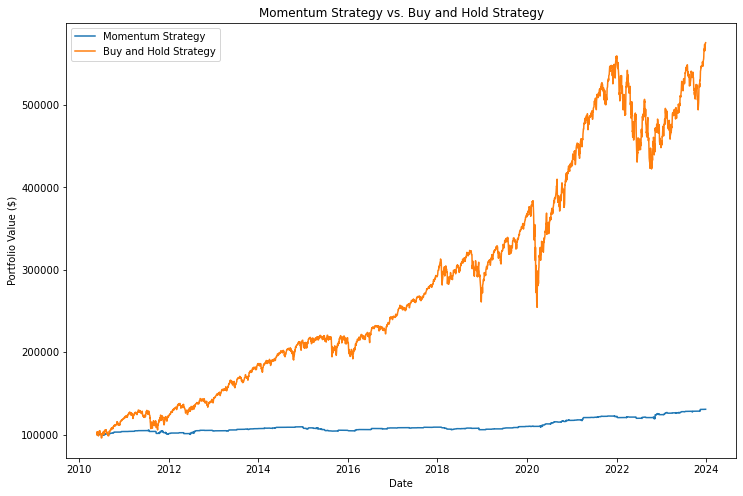

In [73]:
# Constants
RISK_FREE_RATE = 0.01  # Annual risk-free rate
TRADING_DAYS = 252  # Trading days in a year


initial_capital = 100000
data['Position'] = 0  # Current position
data['Cash'] = initial_capital  # Cash in hand
data['Holdings'] = 0  # Value of holdings
data['Portfolio_Value'] = initial_capital  # Total portfolio value
data['Returns'] = 0.0  # Daily returns


# Define the size of the trade as a percentage of available capital
trade_size = 0.1  # i.e., 10% of available capital

# Backtesting the strategy
for i in range(1, len(data)):
    # Check if we have a buy signal
    if data['Signal'].iloc[i] == 1:
        # Determine how much to buy based on trade size and current price
        spend = data['Cash'].iloc[i-1] * trade_size
        bought_shares = spend / data['Adj Close'].iloc[i]
        data['Position'].iloc[i] = data['Position'].iloc[i-1] + bought_shares
        data['Cash'].iloc[i] = data['Cash'].iloc[i-1] - spend
    # Check if we have a sell signal
    elif data['Signal'].iloc[i] == -1 and data['Position'].iloc[i-1] > 0:
        # Sell all shares
        data['Cash'].iloc[i] = data['Cash'].iloc[i-1] + (data['Position'].iloc[i-1] * data['Adj Close'].iloc[i])
        data['Position'].iloc[i] = 0
    else:
        # No trade; carry over the previous state
        data['Position'].iloc[i] = data['Position'].iloc[i-1]
        data['Cash'].iloc[i] = data['Cash'].iloc[i-1]

    # Update the holdings and portfolio value
    data['Holdings'].iloc[i] = data['Position'].iloc[i] * data['Adj Close'].iloc[i]
    data['Portfolio_Value'].iloc[i] = data['Cash'].iloc[i] + data['Holdings'].iloc[i]
    
    data['Returns'].iloc[i] = (data['Portfolio_Value'].iloc[i] / data['Portfolio_Value'].iloc[i - 1] - 1.0) * 100

# Buy-and-Hold Strategy
buy_and_hold = pd.DataFrame(index=data.index)
buy_and_hold_shares = initial_capital // data['Adj Close'][0]
buy_and_hold['Portfolio_Value'] = buy_and_hold_shares * data['Adj Close']
buy_and_hold['Returns'] = buy_and_hold['Portfolio_Value'].pct_change() * 100

# Calculate Sharpe Ratio for Momentum Strategy
excess_returns_momentum = data['Returns'] - (RISK_FREE_RATE / TRADING_DAYS)
sharpe_ratio_momentum = np.sqrt(TRADING_DAYS) * (excess_returns_momentum.mean() / excess_returns_momentum.std())

# Calculate Sharpe Ratio for Buy-and-Hold Strategy
excess_returns_hold = buy_and_hold['Returns'] - (RISK_FREE_RATE / TRADING_DAYS)
sharpe_ratio_hold = np.sqrt(TRADING_DAYS) * (excess_returns_hold.mean() / excess_returns_hold.std())

print(f"Sharpe Ratio of Momentum Strategy: {sharpe_ratio_momentum}")
print(f"Sharpe Ratio of Buy and Hold Strategy: {sharpe_ratio_hold}")

# Plotting the equity curve
plt.figure(figsize=(12, 8))
plt.plot(data['Portfolio_Value'], label='Momentum Strategy')
plt.plot(buy_and_hold['Portfolio_Value'], label='Buy and Hold Strategy')
plt.title('Momentum Strategy vs. Buy and Hold Strategy')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()